In [1]:
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import os,sys
from PIL import Image
from helpers import *
from feature_extraction import *
%load_ext autoreload
%autoreload 2

## Load the Data 
This will allow us to compute the X and Y matrix to train our classifier

In [2]:
# Loaded a set of images
ROOT_DIR = '../../Data-project-2/'
NUM_TRAIN_IMAGE = 100
PATCH_SIZE = 16 # each patch is 16*16 pixels

X_train, Y_train = get_Xtrain_Ytrain(ROOT_DIR,NUM_TRAIN_IMAGE,PATCH_SIZE)

100 training images are available
Loading 100 images
Loading 100 corresponding groundtruth


In [3]:
# Print feature statistics
print('Computed ' + str(X_train.shape[0]) + ' features')
print('Feature dimension = ' + str(X_train.shape[1]))
print('Number of classes = ' + str(np.max(Y_train)+1))

Y0 = [i for i, j in enumerate(Y_train) if j == 0]
Y1 = [i for i, j in enumerate(Y_train) if j == 1]
print('Class 0: ' + str(len(Y0)) + ' samples')
print('Class 1: ' + str(len(Y1)) + ' samples')

Computed 62500 features
Feature dimension = 2
Number of classes = 2
Class 0: 46309 samples
Class 1: 16191 samples


## Balancing the training data
We might want to balance the training data so that we have as many sample from each class

In [4]:
print(X_train.shape)

(62500, 2)


In [8]:
X_train, Y_train = balance_training_set(X_train,Y_train)

Balancing training data...
32382
Old (c0,c1) = (16191,16191)
New (c0,c1) = (16191,16191)


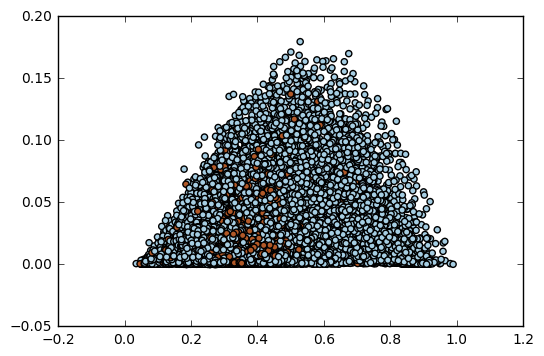

In [14]:
# Plot 2d features using groundtruth to color the datapoints
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, edgecolors='k', cmap=plt.cm.Paired)

In [15]:
# train a logistic regression classifier
from sklearn import linear_model

# we create an instance of the classifier and fit the data
logreg = linear_model.LogisticRegression(C=1e5, class_weight="balanced")
logreg.fit(X_train, Y_train)

LogisticRegression(C=100000.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

# Trying to predict the results
Here I had a lot of troubles to save for each test image the equivalent mask to then be able to create a submission file

In [16]:
sub_path = root_dir + 'dummy_submission.csv'
test_dir_path = root_dir+"test_set_images/"
create_mask_pred_all_test(sub_path,test_dir_path,logreg,patch_size)